# SUMMER ANALYTICS 2024



# Week-1 Assignment

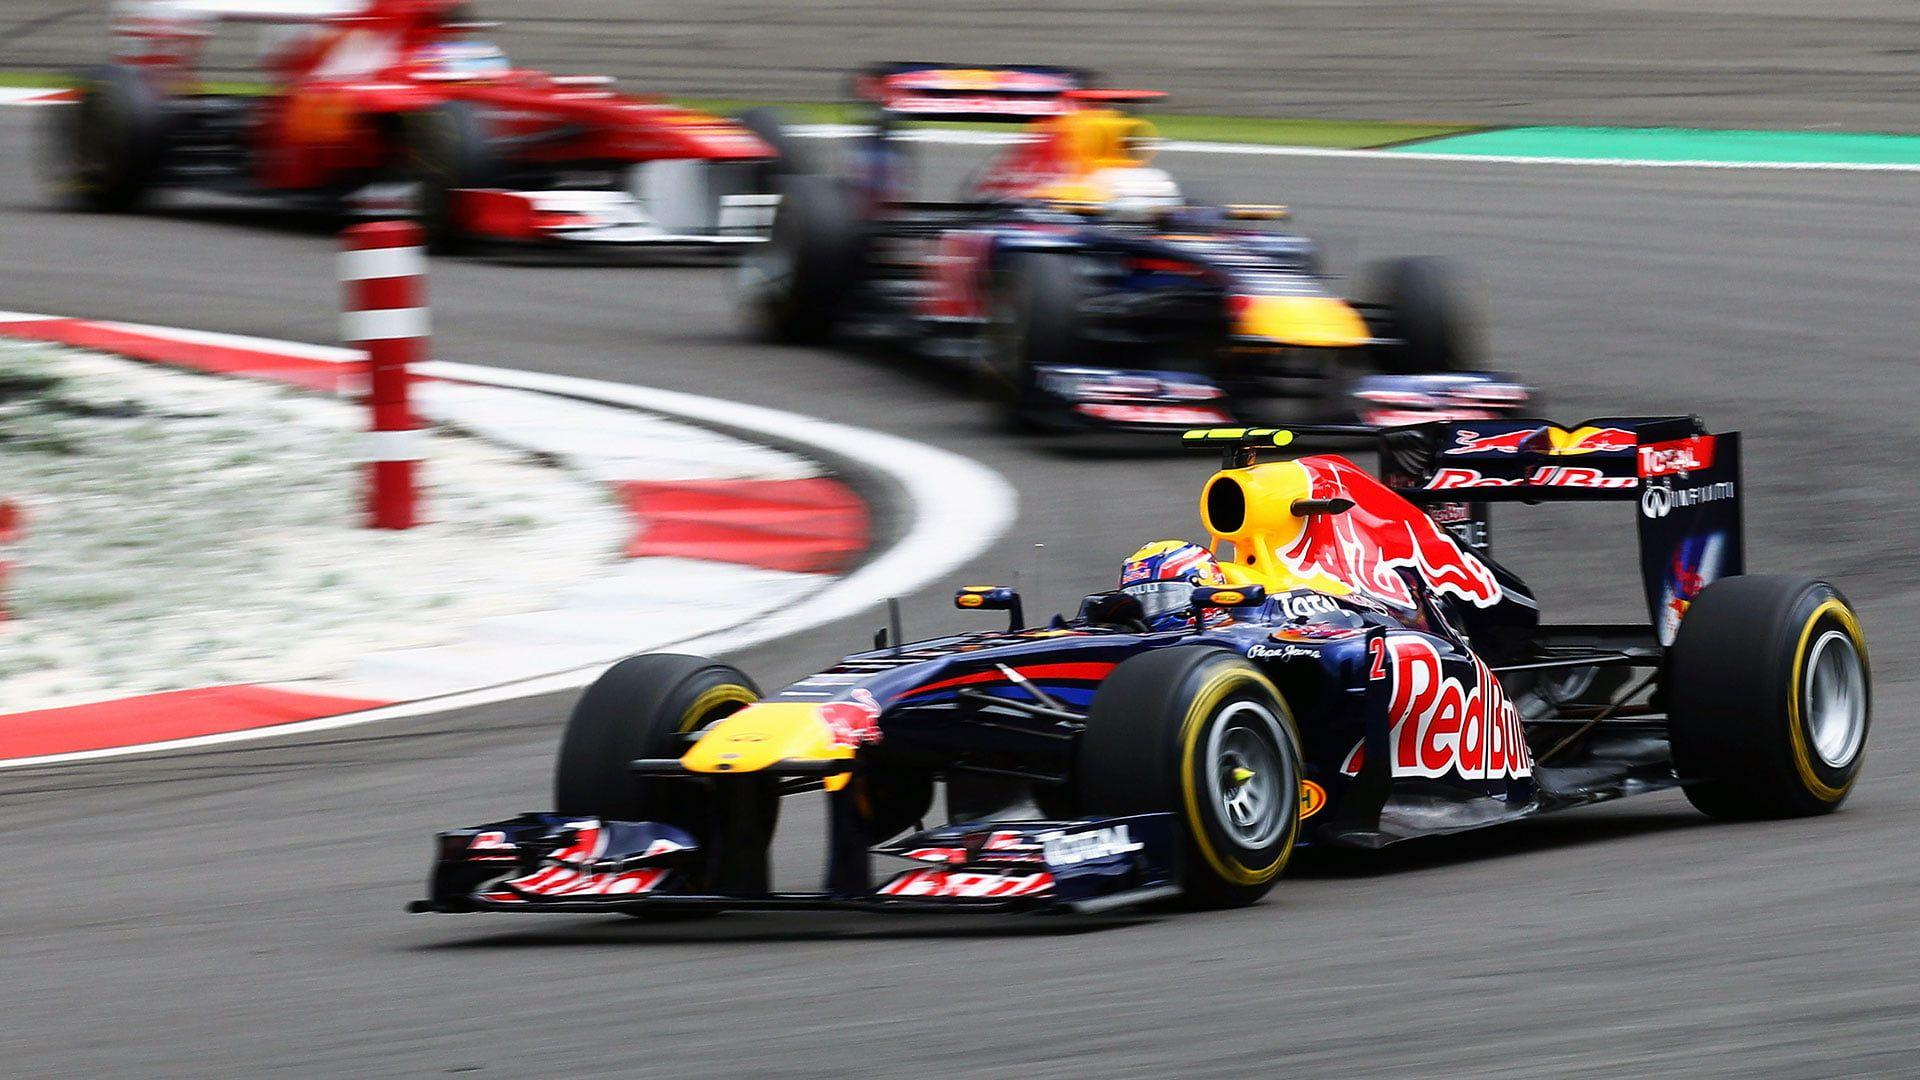

# **Data Grand Prix!**



**Welcome to your first assignment of Summer Analytics 2025! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about cars.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

image.avif

**So lets get started!! Buckle up your belts for this exciting ride!!**

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 2) Read the csv file and assign it to a variable .

In [2]:
df = pd.read_csv("Cars.csv")


### 3) Display shape of dataframe
Expected Output - (398, 9)

In [3]:
df.shape


(398, 9)

In [4]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [5]:
df.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

### 6) Set the 'name' column as the index of dataframe

In [6]:
df.set_index('name', inplace=True)


###  7) Print a list of all the unique mpg values





In [7]:
df['mpg'].unique()


array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

### 8) Create a column which contains the horsepower divided by weightas its metric and make this new column the index.

In [8]:
df['hp_by_weight'] = df['horsepower']/df['weight']
df.reset_index(inplace = True)
df.set_index('hp_by_weight', inplace=True)


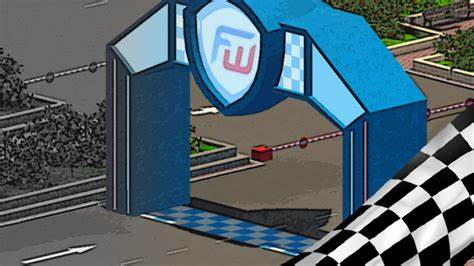

 **Checkpoint!!
Congratulations on making it this far. You are really keeping up in Data Grand Prix.
Now starts the real race i.e. graded questions of the quiz.**

## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. What is name of car that has the highest horsepower?  

In [9]:
df.loc[df['horsepower'].idxmax(),'name']



'pontiac grand prix'

### 2. How many cars have mpg ≥ 35?

In [10]:
(df['mpg'] >= 35).sum()


36

### 3. What is the most common origin for cars with horsepower > 100 and weight < 3000?

In [11]:
df[(df['horsepower'] > 100) & (df['weight'] < 3000)]['origin'].mode()



0    usa
Name: origin, dtype: object

### 4. What is the mean acceleration of cars from Japan? (rounded to 2 decimals)

In [12]:
dfc = df.loc[df['origin'] == 'japan'].copy()
dfc['acceleration'].mean()


16.17215189873418

### 5. Which year had the highest average mpg?

In [13]:
grouped = df.groupby('model_year')
summary = grouped.agg(
    avg_mpg=('mpg', 'mean')
).reset_index()
summary.loc[summary['avg_mpg'].idxmax(),'model_year']

80


## *Congratulations on coming this far! Since we were having so much fun playing with this dataset, let's move towards finish line by attempting some Ungraded questions!*

### **Note:** These questions are UNGRADED, and are given as an extra exercise.

### Find the car (or cars) with the best ratio of horsepower to weight among all cars that also have above-median mpg.

In [14]:
df = df[df.isnull().sum(axis = 1) == 0]

median_mpg = df['mpg'].median()
filtered_df = df[df['mpg'] > median_mpg]
filtered_df['hp_by_weight'] = filtered_df['horsepower']/filtered_df['weight']

filtered_df.loc[filtered_df['hp_by_weight'].idxmax(),'name']


C:\Users\souka\AppData\Local\Temp\ipykernel_17856\2393088625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hp_by_weight'] = filtered_df['horsepower']/filtered_df['weight']


'bmw 2002'

### Design a multi-line plot using Matplotlib or Seaborn that shows the evolution of average mpg over the years, separately for each origin

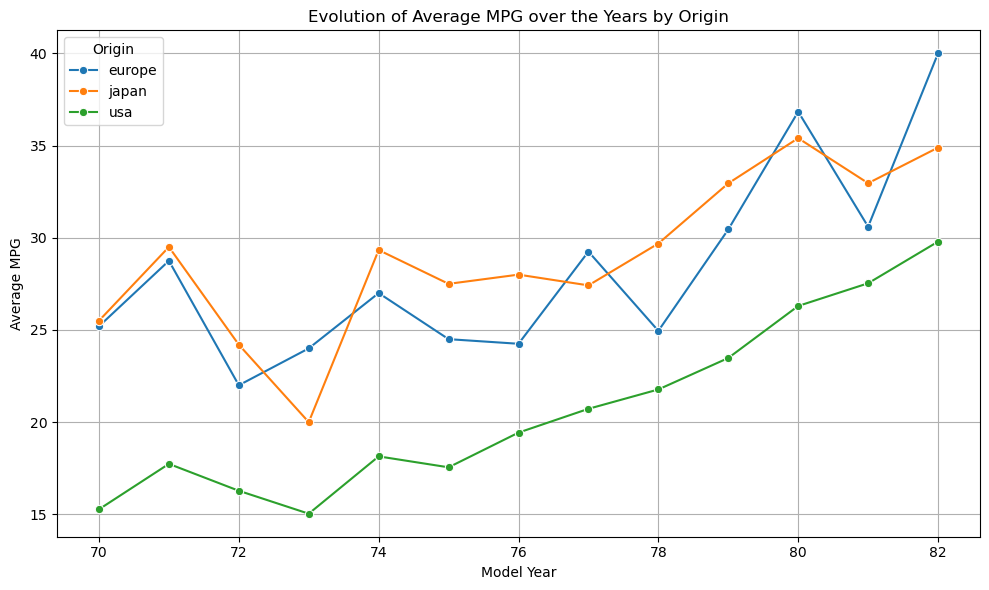

In [15]:
avg_mpg_by_year_origin = df.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_mpg_by_year_origin, x='model_year', y='mpg', hue='origin', marker="o")

plt.title('Evolution of Average MPG over the Years by Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.legend(title='Origin')
plt.grid(True)
plt.tight_layout()
plt.show()


### Create a Seaborn scatterplot (or PairGrid) where:

X = horsepower

Y = weight

Color by: origin

Size by: mpg

Hue order = ['japan', 'europe', 'usa']

Add meaningful plot titles and axis titles.

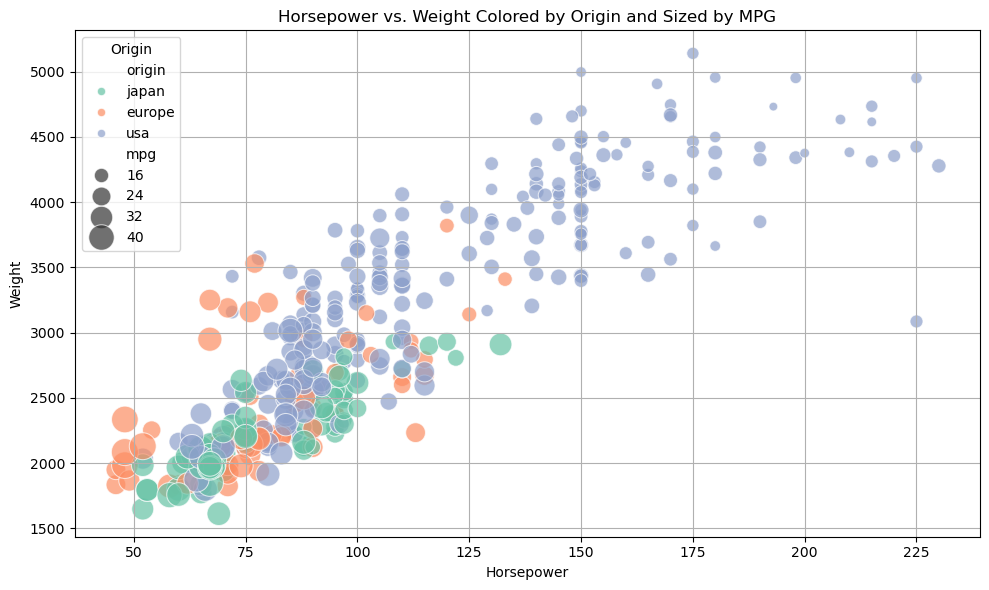

In [16]:
df = df.reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='horsepower',
    y='weight',
    hue='origin',
    size='mpg',
    hue_order=['japan', 'europe', 'usa'],
    sizes=(40, 400),  
    alpha=0.7,        
    palette='Set2'
)

plt.title('Horsepower vs. Weight Colored by Origin and Sized by MPG')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.legend(title='Origin')
plt.grid(True)
plt.tight_layout()
plt.show()



### We define a “consistent” car model as one that was produced over multiple years and had very low variation in mpg across those years (standard deviation < 1.0).

Tasks:

Identify car names that appear in more than one model_year.

For each such name, compute the standard deviation of mpg across years.

Return the car(s) with the lowest variation in mpg, among those with at least 2 appearances and std(mpg) < 1.0.

Report the model name(s), number of appearances, and the average mpg.

Bonus:
Sort the result by number of appearances (descending), then mpg (descending).

In [17]:
df = df[['name', 'model_year', 'mpg']].dropna()
grouped = df.groupby('name')

summary = grouped.agg(
    count=('model_year', 'nunique'),
    total_appearances=('name', 'count'),
    std_mpg=('mpg', 'std'),
    avg_mpg=('mpg', 'mean')
).reset_index()

filtered = summary[(summary['count'] >= 2) & (summary['std_mpg'] < 1.0)]

result1 = filtered.sort_values(by='total_appearances', ascending=False)
print(result1[['name', 'total_appearances', 'avg_mpg']])

result2 = filtered.sort_values(by='avg_mpg', ascending=False)
print(result2[['name', 'total_appearances', 'avg_mpg']])



                          name  total_appearances    avg_mpg
140           ford galaxie 500                  3  14.333333
221          plymouth fury iii                  3  14.333333
10            amc matador (sw)                  2  14.500000
48   chevrolet chevelle malibu                  2  17.500000
94                datsun pl510                  2  27.000000
97                 dodge aspen                  2  18.850000
142      ford gran torino (sw)                  2  13.500000
147                   ford ltd                  2  13.500000
173                  mazda 626                  2  31.450000
256                  saab 99le                  2  24.500000
263        toyota corolla 1200                  2  31.500000
272             toyota mark ii                  2  19.500000
283          volkswagen rabbit                  2  29.250000
                          name  total_appearances    avg_mpg
263        toyota corolla 1200                  2  31.500000
173                  maz

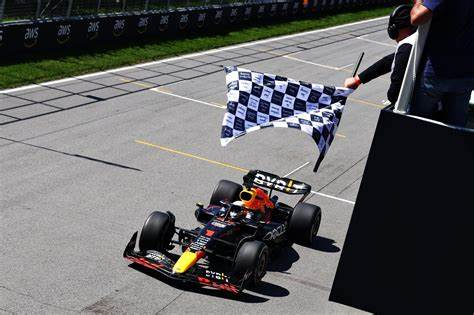

**Congratulations on completing the race. Kudos to you. Looking forward to meet you in next week.**